In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import sys

sys.path.insert(0, os.path.realpath(os.path.join(os.getcwd(), "..")))
import getdist
import IPython
import matplotlib
import matplotlib.pyplot as plt
from getdist import MCSamples, plots

print("GetDist Version: %s, Matplotlib version: %s" % (getdist.__version__, matplotlib.__version__))

GetDist Version: 1.7.4, Matplotlib version: 3.10.0


In [2]:
import pandas as pd
from getdist import MCSamples, plots
import numpy as np

In [3]:
# --- LOAD TURING DATA ---
# Read the CSVs exported from Julia
lcdm = pd.read_csv("lcdm1_chains.csv")
gp = pd.read_csv("lcdm2_chains.csv")


# # Convert to numpy arrays
samps_lcdm = np.array(lcdm[["omegam_pr", "s8_pr", "h0_pr", "rd_pr", "M_pr"]])
samps_gp = np.array(gp[["omegam_po", "s8_po", "h_po", "r_po", "M_po"]])  

# --- CREATE GETDIST OBJECTS ---
names = ["om", "s8", "h0", "R", "M"]
labels = [r"\Omega_m", r"s_8", r"h_0", r"R_d", r"M"]

samples1 = MCSamples(samples=samps_lcdm, names=names, labels=labels, label="LCDM")
samples2 = MCSamples(samples=samps_gp, names=names, labels=labels, label="GP")


Removed no burn in
Removed no burn in


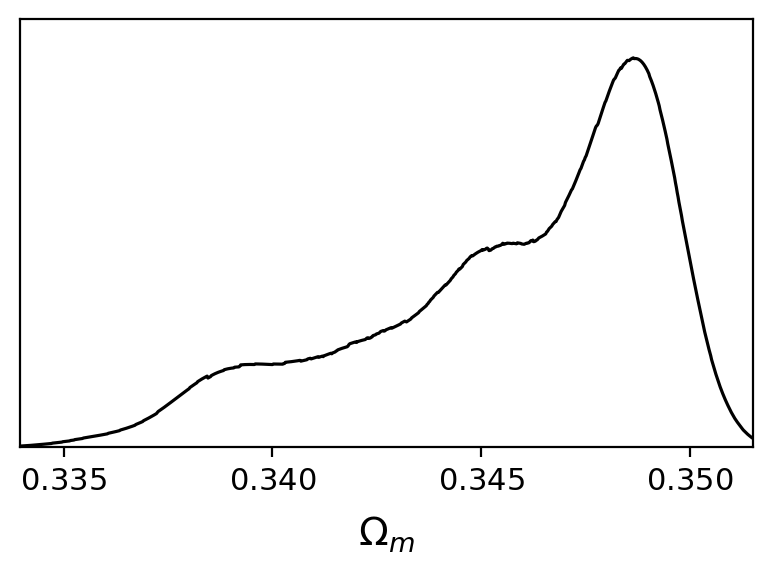

In [4]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d(samples1, "om")
g.fig

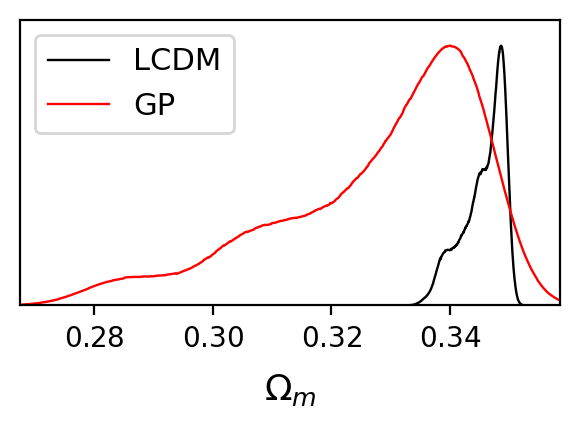

In [5]:
# 1D marginalized comparison plot
g = plots.get_single_plotter(width_inch=3)
g.plot_1d([samples1, samples2], "om")
g.add_legend(["LCDM", "GP"], legend_loc='best')
g.fig

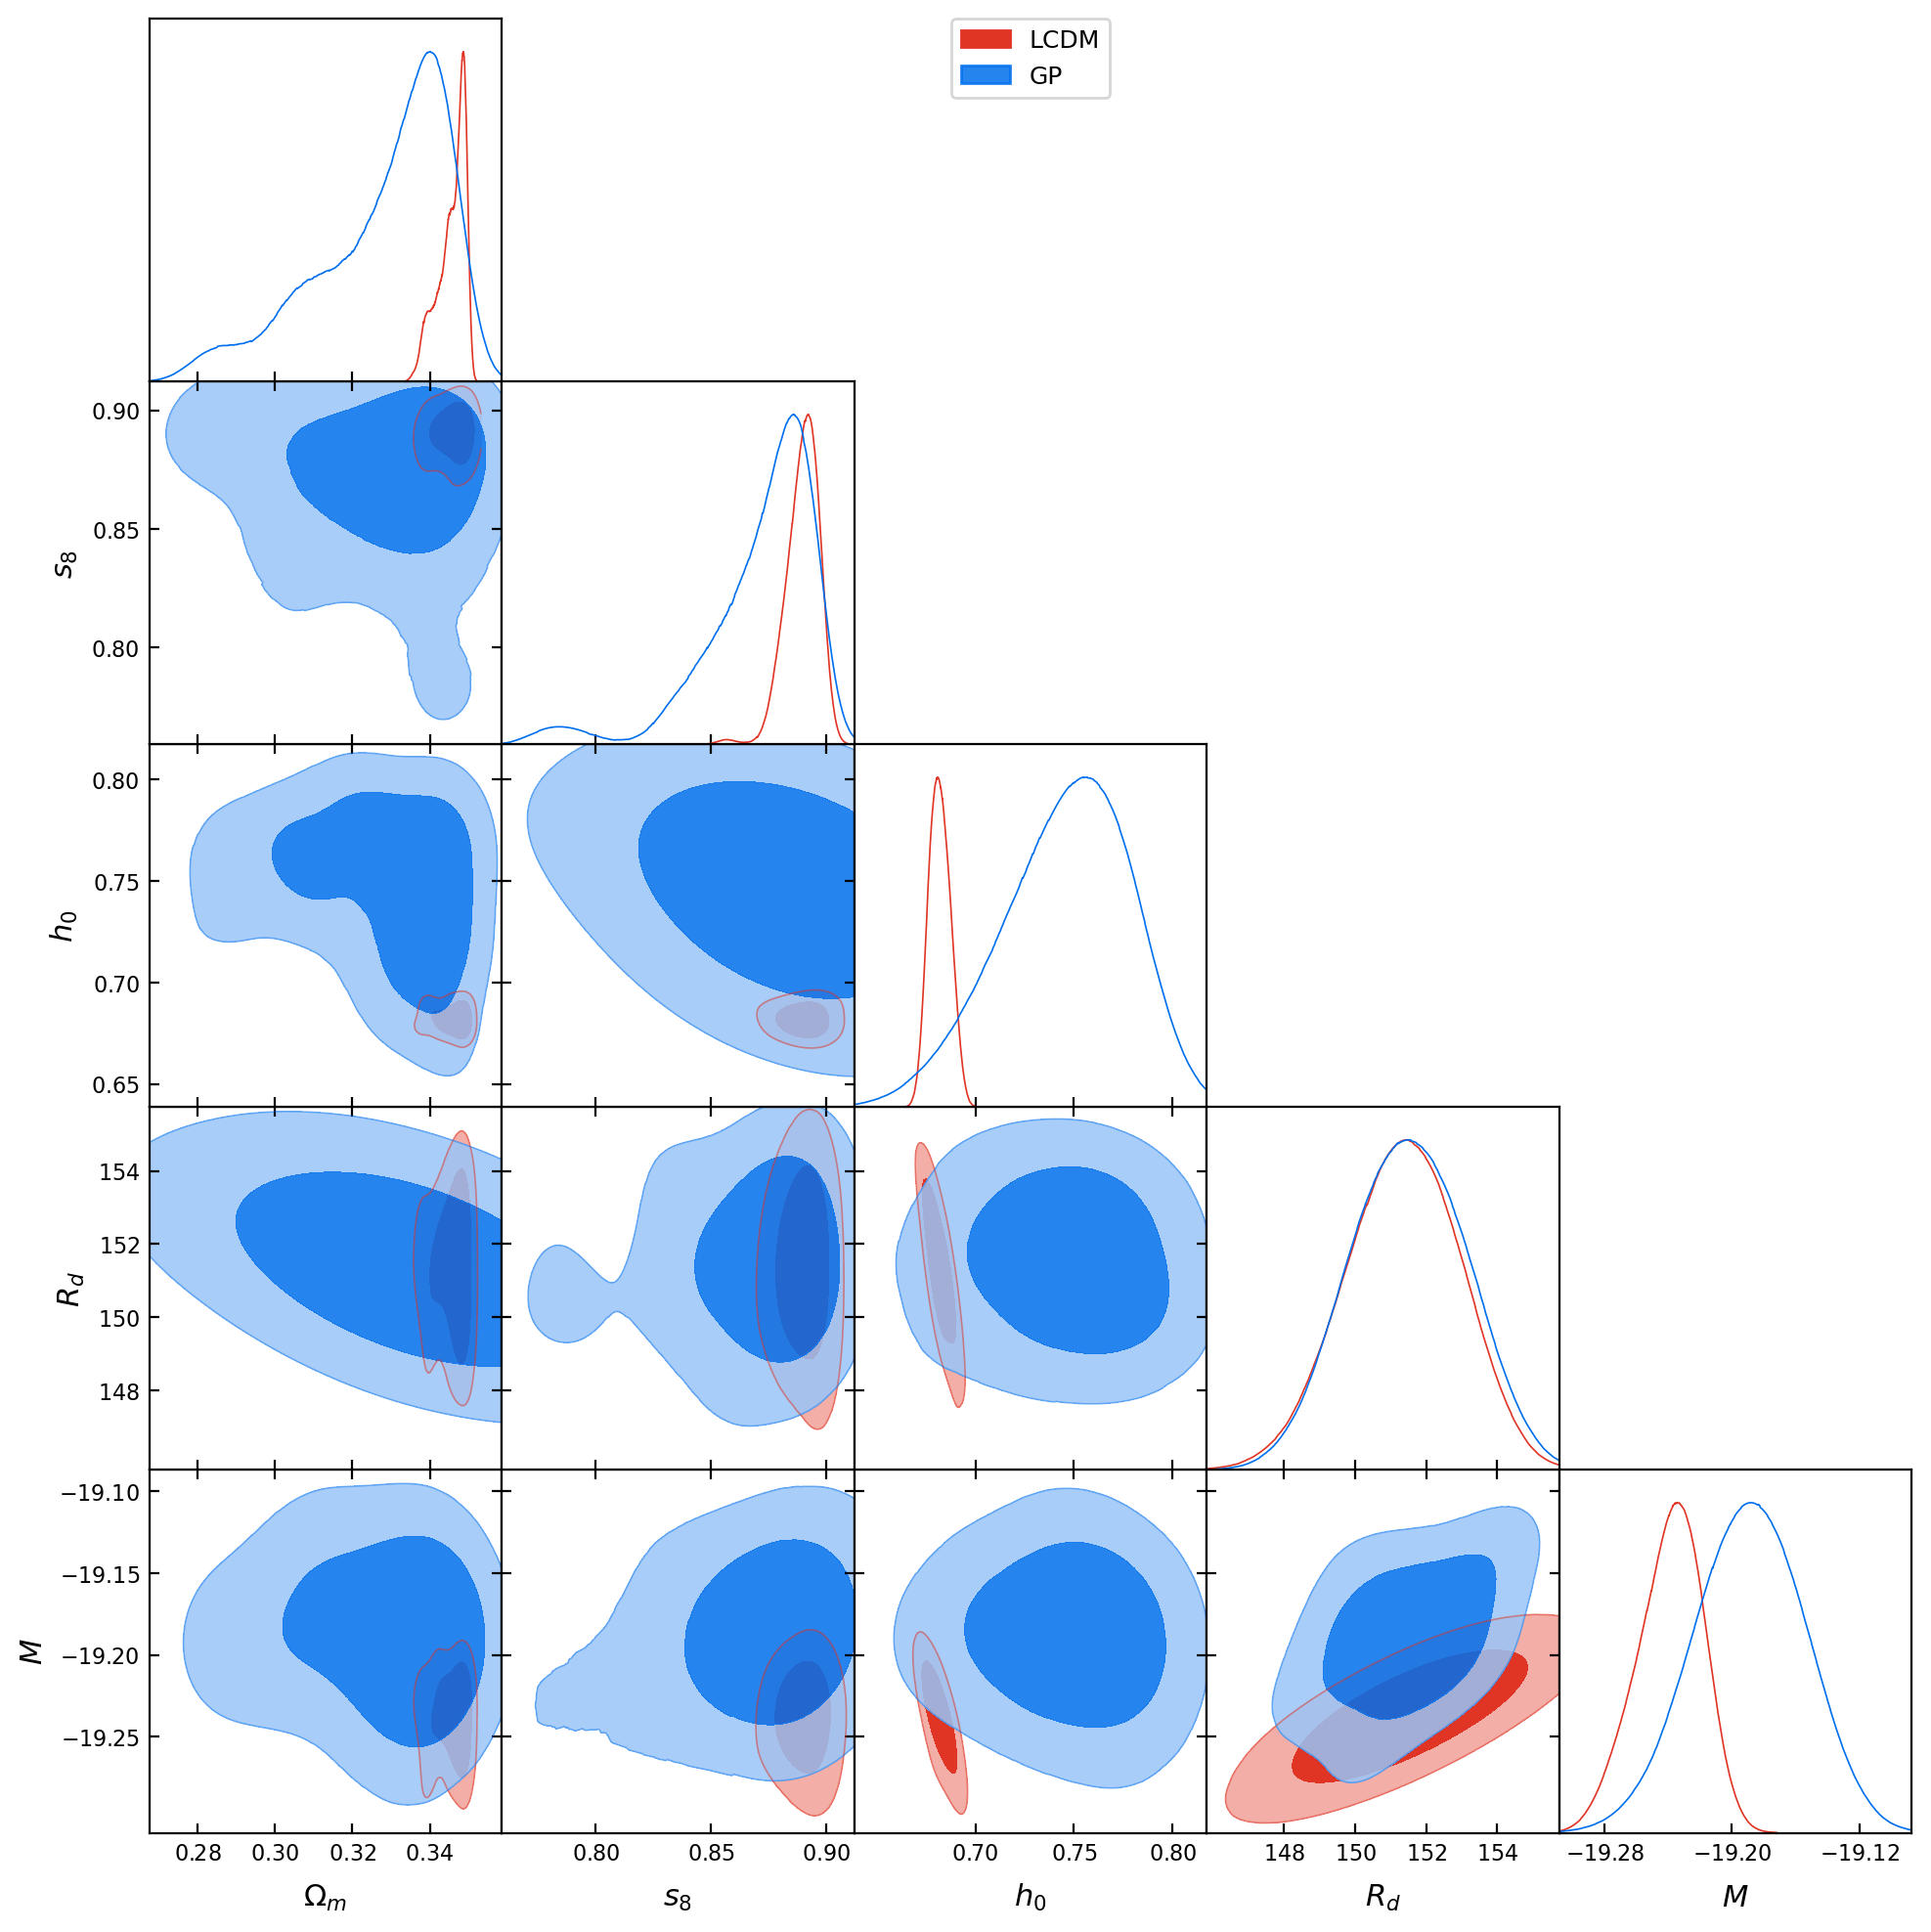

In [6]:
# Triangle plot (sometimes also called a corner plot)
g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2], filled=True)
g.fig

In [7]:
# hzdf = pd.read_csv("hz_data.csv")
# hz_data = hzdf["data"]
# hz_z = hzdf["z"]
# hz_error = hzdf["err"]
# z_integ = pd.read_csv("zinteg1.csv")
# # 1. Define the specific columns you want to include in the subset
# # This creates a list: ['model[1]', 'model[2]', ..., 'model[20]']
# target_cols1 = [f'hz_model[{i}]' for i in range(1, 301)]
# target_cols2 = [f'hdata[{i}]' for i in range(1, 301)]

# # 2. Extract the subset and calculate statistics
# lcdm_df = lcdm[target_cols1]
# gp_df = gp[target_cols2]

# mean_vals_lcdm = lcdm_df.mean()
# std_vals_lcdm = lcdm_df.std()

# mean_vals_gp = gp_df.mean()
# std_vals_gp = gp_df.std()

# # 3. Create the plot
# z = z_integ["z_integ"]  # X-axis representing the models 1 to 20
# plt.figure(figsize=(10, 6))

# #hz_data
# plt.errorbar(hz_z, hz_data, yerr=hz_error, fmt='.', color='black', capsize=2, label='H(z) fake data')

# # Plot LCDM
# plt.plot(z, mean_vals, color='darkblue', label='LCDM mean', linewidth=2)
# plt.fill_between(z, mean_vals - std_vals, mean_vals + std_vals, color='blue', alpha=0.3, label='LCDM standard dev.')

# #Plot GP
# plt.plot(z, mean_vals, color='darkorange', label='GP mean', linewidth=2)
# plt.fill_between(z, mean_vals - std_vals, mean_vals + std_vals, color='orange', alpha=0.3, label='GP standard dev.')

# # Formatting
# plt.title('Comparison of LCDM and GP constraints on H(z)')
# plt.xlabel(r'$z$')
# plt.ylabel(r'$H(z) \ [\mathrm{km \ s^{-1} \ Mpc^{-1}}]$')
# # plt.xticks(z)
# plt.legend()
# # plt.grid(True, linestyle=':', alpha=0.7)

# plt.show()